In [14]:
import pandas as pd
import numpy as np

In [15]:
df_l1= pd.read_csv('/kaggle/input/hindi-indicbert/train_hi_l1.csv')
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0


In [16]:
annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [17]:
df_test = pd.read_csv('/kaggle/input/hindi-indicbert/test_hi_l1.csv', engine='python')
df_test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN


In [18]:
annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [19]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN,0.0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0,0.0


In [20]:
# Apply to DataFrame
df_test['label_1'] = df_test[annotation_cols].apply(get_majority_label,axis=1)
df_test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN,0.0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN,0.0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN,0.0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN,1.0
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN,0.0


In [21]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

# Convert to int
df = df.dropna(subset=['label_1'])
df['label_1'] = df['label_1'].astype(int)

# Preview
print(df.head())
print(df.shape)
df

                                                text  label_1
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...        0
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...        0
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...        0
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...        0
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...        1
(6196, 2)


,text,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1
...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",0


In [22]:
df2 = pd.DataFrame({
    'text': df_test['text'],
    'label_1': df_test['label_1'],

})

# Convert to int
df2 = df2.dropna(subset=['label_1'])
df2['label_1'] = df2['label_1'].astype(int)

# Preview
print(df2.head())
print(df2.shape)
df2

                                                text  label_1
0  #BandraStation #SharadPawar #Muradabad  अगर अभ...        0
1  #ConspiracyAgainstIndia  सुन लो रे देश के गद्द...        0
2  #MarathaReservation : महाराष्ट्र में जश्न का म...        0
3  #RheaChakraborty aap Mahesh bhatt se madad kiy...        1
4  #SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...        0
(1516, 2)


,text,label_1
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,1
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",0
...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",1
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,0


In [23]:
import re
def normalize_text(text):
    text = re.sub(r'<handle replaced>', '[USER]', text)       # Replace user handles
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          # Remove URLs
    text = re.sub(r'<.*?>', '', text)                          # Remove any other HTML tags
    text = re.sub(r'\s+', ' ', text).strip()                   # Normalize whitespace
    return text

In [24]:

df['text'] = df['text'].apply(normalize_text)
df



,text,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक्त...,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए रात...,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम ग...,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी क...,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1
...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली :...",0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें सती प...,0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",0


In [25]:
df2['text'] = df2['text'].apply(normalize_text)
df2

,text,label_1
0,#BandraStation #SharadPawar #Muradabad अगर अभी...,0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्दा...,0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,1
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",0
...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",1
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संविध...,0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़ी...,0


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch [1/5] | Train Loss: 0.6111 | Val Loss: 0.5335 | Weighted F1: 0.6616 | Macro F1: 0.4331
Epoch [2/5] | Train Loss: 0.5808 | Val Loss: 0.5490 | Weighted F1: 0.6616 | Macro F1: 0.4331
Epoch [3/5] | Train Loss: 0.5696 | Val Loss: 0.5270 | Weighted F1: 0.6616 | Macro F1: 0.4331
Epoch [4/5] | Train Loss: 0.5521 | Val Loss: 0.5122 | Weighted F1: 0.6616 | Macro F1: 0.4331
Epoch [5/5] | Train Loss: 0.5308 | Val Loss: 0.5277 | Weighted F1: 0.6906 | Macro F1: 0.4949
Final Test Loss: 0.5277
Final Test Weighted F1 Score: 0.6906
Final Test Macro F1 Score: 0.4949


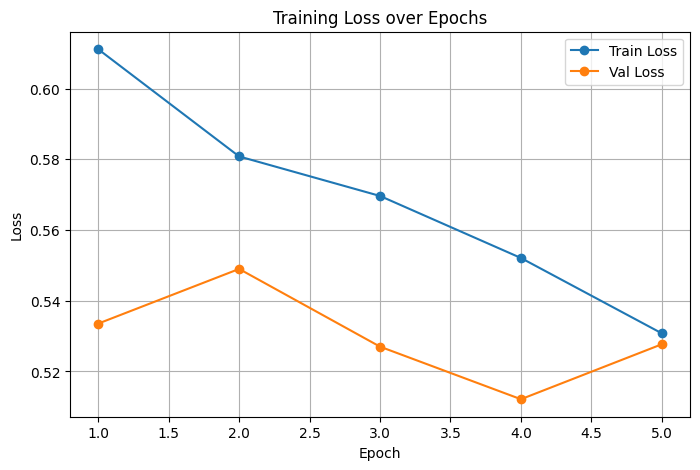

In [26]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import numpy as np
from sklearn.metrics import f1_score
from torch.optim import Adam
import matplotlib.pyplot as plt
########################################################################
# 1. Custom PyTorch Dataset
########################################################################
class GenderAbuseDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

########################################################################
# 2. Training Function
########################################################################
def train_one_epoch(model, data_loader,optimizer, device):
    model.train()
    total_loss = 0

    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

########################################################################
# 3. Evaluation Function
########################################################################
def evaluate(model, data_loader, device):
    model.eval()
    preds = []
    true_labels = []
    total_loss = 0


    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            total_loss += outputs.loss.item()

            # Predicted class is the one with the highest score
            predicted_class = torch.argmax(logits, dim=-1)
            preds.extend(predicted_class.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Compute weighted F1 score
    avg_loss = total_loss / len(data_loader)

    f1 = f1_score(true_labels, preds, average='weighted')
    macro_f1 = f1_score(true_labels, preds, average='macro')

    return avg_loss,f1,macro_f1

########################################################################
# 4. Main Script
########################################################################
def main():




    # -------------------------------
    # B) Initialize Tokenizer
    # -------------------------------
    model_name = "ai4bharat/indic-bert"
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # -------------------------------
    # C) Create PyTorch Datasets
    # -------------------------------
    train_dataset = GenderAbuseDataset(
        texts=df['text'].values,
        labels=df['label_1'].values,
        tokenizer=tokenizer,
        max_len=128
    )

    test_dataset = GenderAbuseDataset(
        texts=df2['text'].values,
        labels=df2['label_1'].values,
        tokenizer=tokenizer,
        max_len=128
    )

    # -------------------------------
    # D) Create DataLoaders
    # -------------------------------
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # -------------------------------
    # E) Initialize Model
    # -------------------------------
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
    model.to(device)

    # -------------------------------
    # F) Optimizer

    # -------------------------------
    optimizer = AdamW(model.parameters(), lr=0.000005)

    # -------------------------------
    # G) Training Loop
    # -------------------------------
    epochs = 5  # Adjust based on data size
    train_losses = []
    val_losses = []
    macro_f1_scores = []

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader,optimizer, device)
        train_losses.append(train_loss)
        val_loss, weighted_f1, macro_f1 = evaluate(model, test_loader, device)
        val_losses.append(val_loss)
        macro_f1_scores.append(macro_f1)
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Weighted F1: {weighted_f1:.4f} | Macro F1: {macro_f1:.4f}")

    # -------------------------------
    # H) Final Evaluation
    # -------------------------------
    final_val_loss, final_weighted_f1, final_macro_f1 = evaluate(model, test_loader, device)
    print(f"Final Test Loss: {final_val_loss:.4f}")
    print(f"Final Test Weighted F1 Score: {final_weighted_f1:.4f}")
    print(f"Final Test Macro F1 Score: {final_macro_f1:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
    plt.plot(range(1, epochs+1), val_losses, marker='o', label="Val Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
